<a href="https://colab.research.google.com/github/mccoymb/AAE-590-DSMM/blob/main/Lecture12_Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

In [23]:
import numpy as np

In [24]:
microstructure = np.array ([[1,0,1],[00,1,0],[1,0,1]])
height = 3
width = 3

In [25]:
count = 0
total_pairs = 0
for i in range(height):
  for j in range(width):
    if microstructure[i,j] != 1:
      continue
    i2 = (i + delti)
    j2 = (j + deltj)

    if microstructure[i2,j2] == 1:
      count +=1
    total_pairs +=1

S2 = count / (total_pairs + 1e-12)

NameError: name 'delti' is not defined

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

def calc_two_point_correlation(image):
  image = image.astype(float)

  fft_image = fft2(image)

  power_spectrum = np.abs(fft_image)**2

  correlation=ifft2(power_spectrum)

  correlation /=np.max(correlation)

  return np.real(correlation)

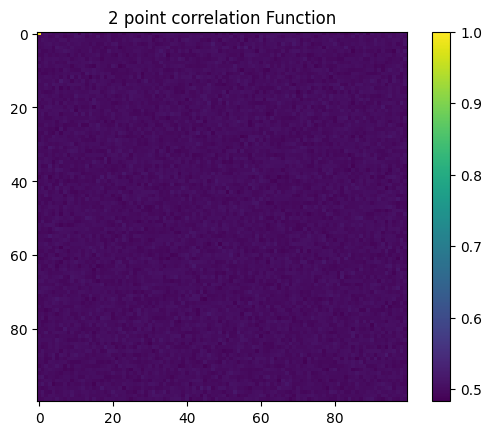

In [37]:
def plot_correlation(correlation,title="2 point correlation Function"):

  plt.imshow(correlation,cmap='viridis')
  plt.title(title)
  plt.colorbar()
  plt.show()
if __name__== "__main__":
  image = np.random.randint(0,2,size=(100,100))
  correlation = calc_two_point_correlation(image)
  plot_correlation(correlation)

In [43]:
import numpy as np
from skimage import io, filters

image = io.imread("microstructure.tif")
thresh = filters.threshold_otsu(image)
binary = (image > thresh).astype(np.float32)

<ipython-input-43-0f1aefd73972>:5: UserWarning: threshold_otsu is expected to work correctly only for grayscale images; image shape (1085, 1125, 3) looks like that of an RGB image.
  thresh = filters.threshold_otsu(image)


In [42]:
def two_point_direct(binary, r_max):
    height, width = binary.shape
    S2 = np.zeros(r_max)
    counts = np.zeros(r_max)
    phi = np.mean(binary)

    for i in range(height):
        for j in range(width):
            if binary[i, j] == 1:
                for di in range(-r_max, r_max+1):
                    for dj in range(-r_max, r_max+1):
                        r = int(np.hypot(di, dj))
                        if 0 < r < r_max:
                            i2 = (i + di) % height  # Periodic boundary
                            j2 = (j + dj) % width
                            if binary[i2, j2] == 1:
                                S2[r] += 1
                            counts[r] += 1

    return S2 / (counts * phi**2 + 1e-12)


In [41]:
def radial_average(S2):
    L = S2.shape[0]
    y, x = np.indcies((L, L)) - L//2
    r = np.sqrt(x**2 + y **2).astype(int)
    r_flat = r.ravel()
    S2_flat = S2.ravel()

    r_bins = np.arrange(0, np.max(r) + 1)
    radial_sum = np.bincount(r_flat, weights = S2_flat, minlength=lens(r_bins))
    counts = np.bincount(r_flat, minlength=len(r_bins))
    return radial_sum / counts + 1e-12

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2

binary = ...


S2 = two_point_fft(binary)

r = np.arange(S2.shape[0]//2)
S2_radial = radial_average(S2)[0:len(r)]


plt.plot(r, S2_radial)
plt.xlabel('Radial Distance (pixels)')
plt.ylabel('S2(r)')
plt.title('Two-Point Correlation Function')
plt.grid(True)
plt.show()


NameError: name 'two_point_fft' is not defined

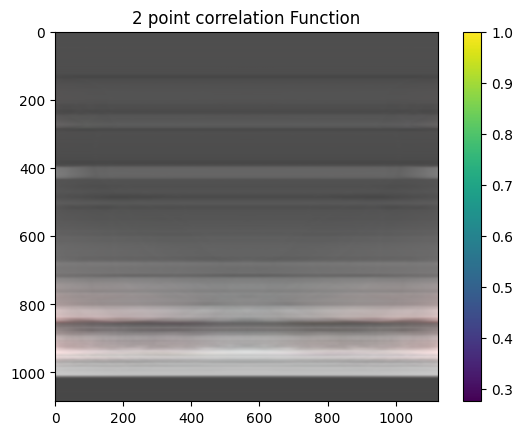

In [45]:
def plot_correlation(correlation,title="2 point correlation Function"):

  plt.imshow(correlation,cmap='viridis')
  plt.title(title)
  plt.colorbar()
  plt.show()
if __name__== "__main__":
  image = io.imread("microstructure.tif")
  correlation = calc_two_point_correlation(image)
  plot_correlation(correlation)